<a href="https://colab.research.google.com/github/Joyfull-Joyal/sign_language_interprter_Main-Project/blob/CNN/CNN_augmented_Dataset3_0_epoch_20_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 2320 images belonging to 29 classes.
Found 290 images belonging to 29 classes.
Found 290 images belonging to 29 classes.
Epoch 1/20
72/72 [==============================] - 324s 4s/step - loss: 3.1127 - accuracy: 0.0791 - val_loss: 3.4017 - val_accuracy: 0.1042
Epoch 2/20
72/72 [==============================] - 319s 4s/step - loss: 2.8733 - accuracy: 0.1219 - val_loss: 3.3574 - val_accuracy: 0.1042
Epoch 3/20
72/72 [==============================] - 327s 5s/step - loss: 2.6652 - accuracy: 0.1591 - val_loss: 3.6066 - val_accuracy: 0.1146
Epoch 4/20
72/72 [==============================] - 318s 4s/step - loss: 2.3767 - accuracy: 0.2369 - val_loss: 3.1184 - val_accuracy: 0.2014
Epoch 5/20
72/72 [==============================] - 325s 5s/step - loss: 2.1665 - accuracy: 0.2946 - val_loss: 3.0587 - val_accuracy: 0.2951
Epoch 6/20
72/72 [==============================] - 327s 5s/step - loss: 1.9195 - accuracy: 0.3824 - val_loss: 3.0521 - val_accuracy: 0.4236
Epoch 7/20
72/72 [=========

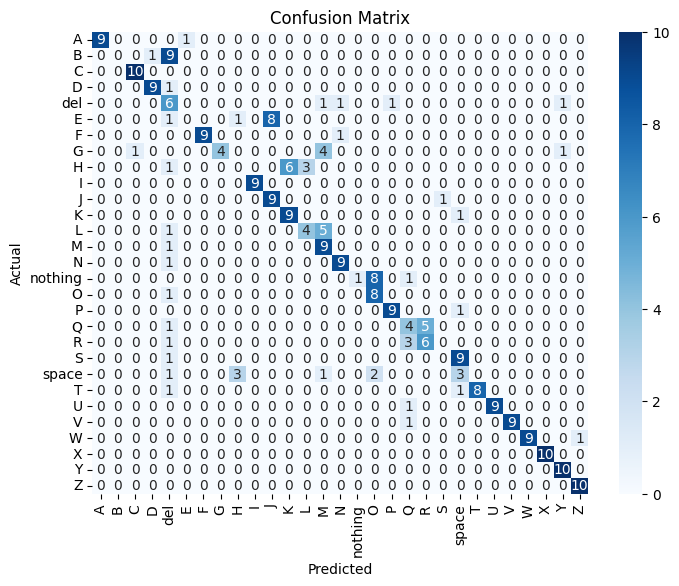

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test loss: 1.0285
Test accuracy: 66.67
Train loss: 0.6378
Train accuracy: 79.43
Recall: 0.67
Precision: 0.66
F1-score: 0.64
RMSE: 3.99


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, mean_squared_error, confusion_matrix
import seaborn as sns

# Define your data directories
train_dir = '/content/drive/MyDrive/Dataset/Dataset3.0/train'
val_dir = '/content/drive/MyDrive/Dataset/Dataset3.0/validation'
test_dir = '/content/drive/MyDrive/Dataset/Dataset3.0/test'

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model architecture with dropout regularization
input_layer = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(29, activation='softmax')(x)  # Assuming 29 classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)

# Calculate recall
y_true = []
y_pred = []
for i in range(test_generator.n // batch_size):
    batch_x, batch_y = next(test_generator)
    y_true.extend(np.argmax(batch_y, axis=1))
    y_pred.extend(np.argmax(model.predict(batch_x), axis=1))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'], yticklabels=['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate other metrics
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Display metrics
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}')
print(f'Train loss: {train_loss:.4f}')
print(f'Train accuracy: {train_accuracy * 100:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'RMSE: {rmse:.2f}')

# Save the trained model
model.save('/content/drive/MyDrive/Project/Modeltest/sign_language_interpreter_CNN_augmented_Dataset3.0_epoch_20_32.h5')


Saving 100.jpg to 100.jpg


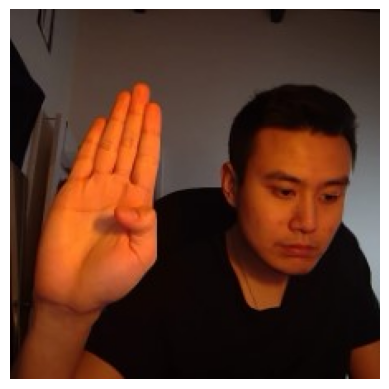

1/1 [==============================] - 0s 186ms/step
Predicted class: B


In [ ]:
from google.colab import files
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt  # Import Matplotlib for image preview
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet_v2 import preprocess_input

# Define class labels
class_labels = ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Load the trained model
loaded_model = load_model('/content/drive/MyDrive/Project/Modeltest/sign_language_interprter_CNN_Dataset3.0_epoch_10_32.h5')

def predict_image(file_path):
    img = Image.open(file_path)
    img = img.resize((224, 224))  # Resize to match the model input size

    # Display the image preview
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image for prediction
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    processed_img = preprocess_input(img_array)

    # Use the loaded model to make predictions
    prediction = loaded_model.predict(processed_img)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Display the predicted class
    print(f"Predicted class: {predicted_class_label}")

# Upload an image file
uploaded = files.upload()

if uploaded:
    file_path = list(uploaded.keys())[0]
    predict_image(file_path)
else:
    print("No file selected.")


Found 996 images belonging to 29 classes.
32/32 [==============================] - 36s 1s/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


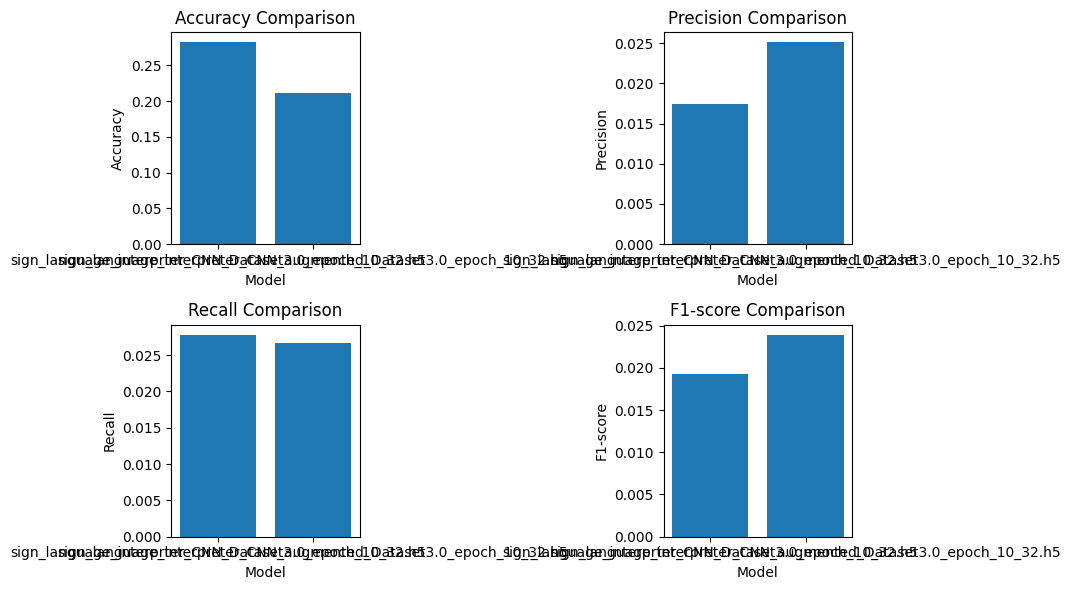

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define directories and test data generator
test_dir = '/content/drive/MyDrive/Dataset/Dataset2.0/test'
img_size = (224, 224)
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load saved models
model_paths = [
    '/content/drive/MyDrive/Project/Modeltest/sign_language_interprter_CNN_Dataset3.0_epoch_10_32.h5',
    '/content/drive/MyDrive/Project/Modeltest/sign_language_interpreter_CNN_augmented_Dataset3.0_epoch_10_32.h5'
]

models = []
model_names = []

for path in model_paths:
    model = load_model(path)
    models.append(model)
    model_names.append(os.path.basename(path))

# Evaluate models
evaluations = []

for model, name in zip(models, model_names):
    evaluation = model.evaluate(test_generator)

    # Predict labels for test data
    y_true = test_generator.classes
    y_pred = np.argmax(model.predict(test_generator), axis=1)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    evaluations.append((name, evaluation[1], precision, recall, f1))  # Use evaluation[1] for accuracy

# Plot comparison graphs
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
eval_metrics = np.array(list(zip(*evaluations))[1:])  # Convert to numpy array for easier indexing
model_names = list(zip(*evaluations))[0]

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics_names):
    plt.subplot(2, 2, i + 1)
    plt.bar(model_names, eval_metrics[i])  # Use eval_metrics[i] directly for each metric
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()


Found 290 images belonging to 29 classes.
10/10 [==============================] - 16s 2s/step

Evaluation Metrics for sign_language_interprter_CNN_Dataset3.0_epoch_10_32.h5:
Accuracy: 0.8103
Precision: 0.0148
Recall: 0.02
F1-score: 0.0168
10/10 [==============================] - 11s 1s/step

Evaluation Metrics for sign_language_interpreter_CNN_augmented_Dataset3.0_epoch_10_32.h5:
Accuracy: 0.5931
Precision: 0.0113
Recall: 0.02
F1-score: 0.0132


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


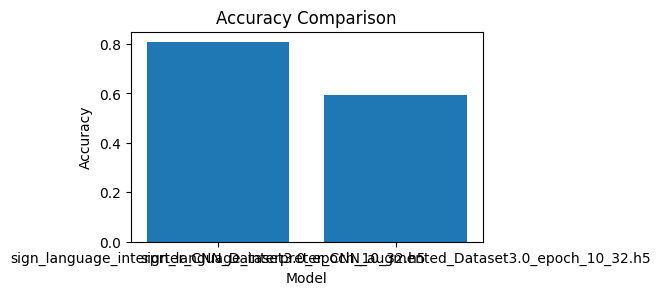

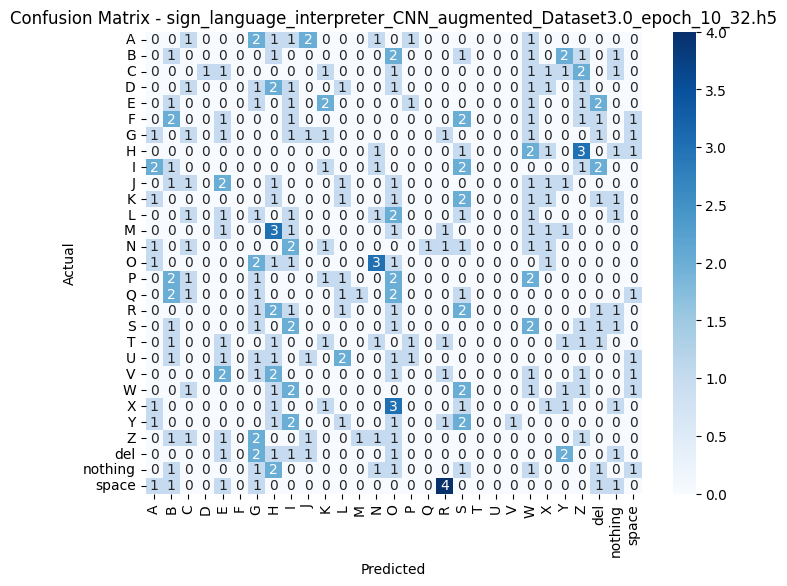

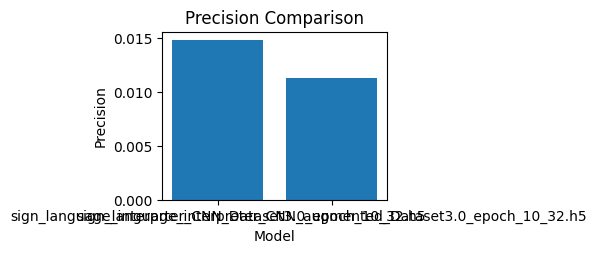

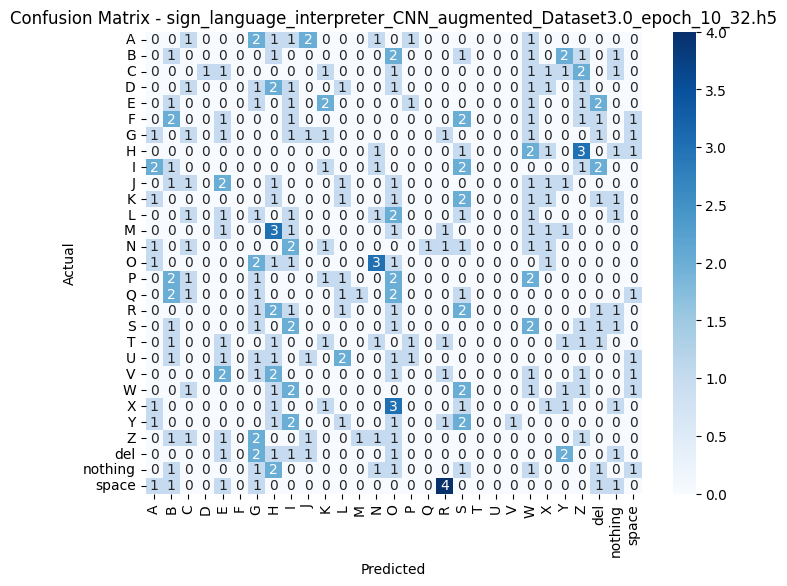

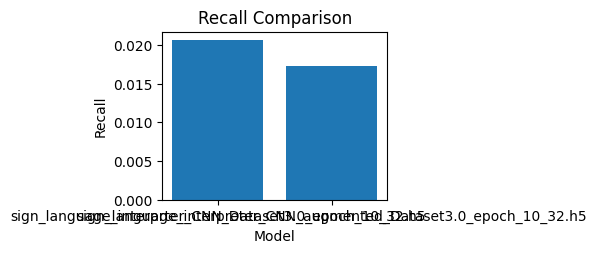

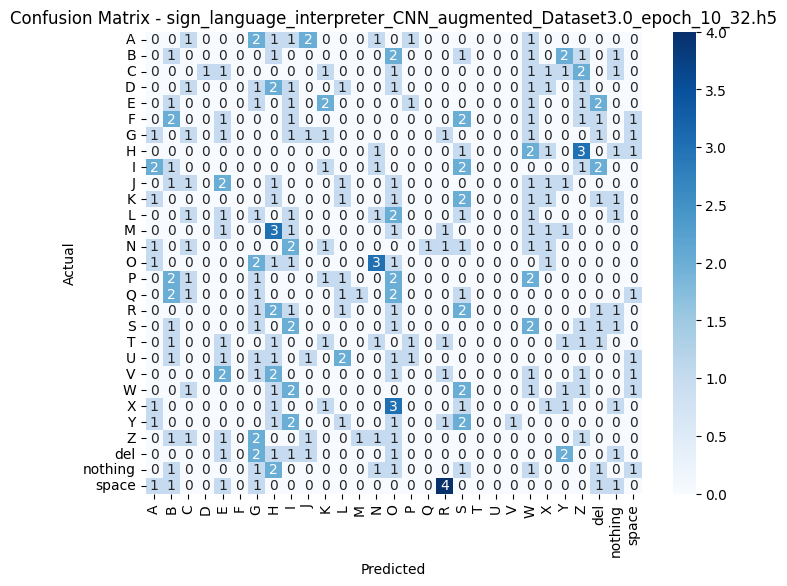

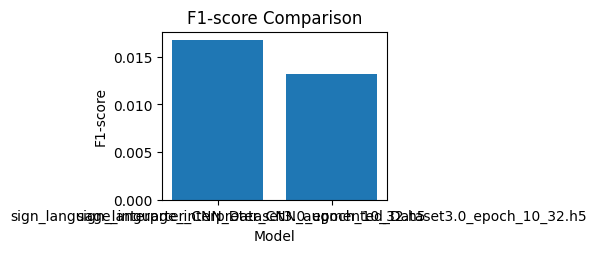

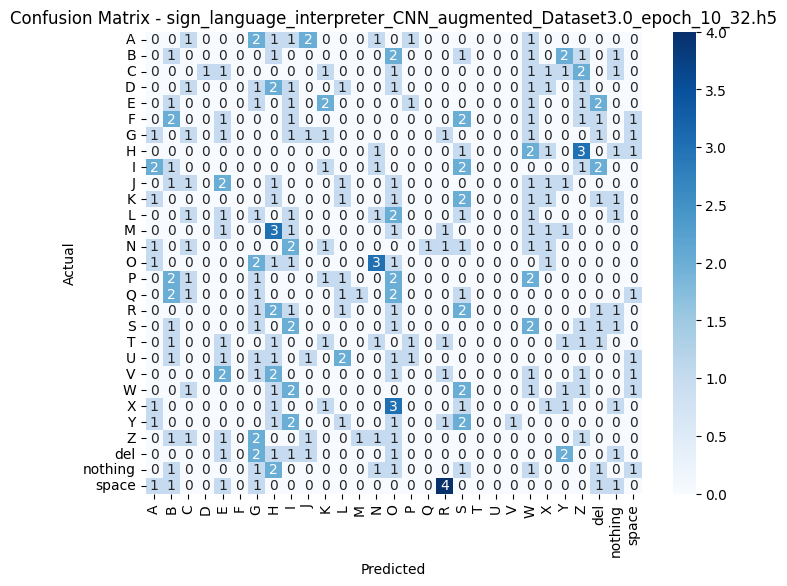

<Figure size 640x480 with 0 Axes>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define directories and test data generator
test_dir = '/content/drive/MyDrive/Dataset/Dataset3.0/test'
img_size = (224, 224)
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load saved models
model_paths = [
    '/content/drive/MyDrive/Project/Modeltest/sign_language_interprter_CNN_Dataset3.0_epoch_10_32.h5',
    '/content/drive/MyDrive/Project/Modeltest/sign_language_interpreter_CNN_augmented_Dataset3.0_epoch_10_32.h5'
]

models = []
model_names = []

for path in model_paths:
    model = load_model(path)
    models.append(model)
    model_names.append(os.path.basename(path))

# Evaluate models
evaluations = []

for model, name in zip(models, model_names):
    evaluation = model.evaluate(test_generator)

    # Predict labels for test data
    y_true = test_generator.classes
    y_pred = np.argmax(model.predict(test_generator), axis=1)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Print evaluation metrics
    print(f'\nEvaluation Metrics for {name}:')
    print(f'Accuracy: {evaluation[1]:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.4f}')

    evaluations.append((name, evaluation[1], precision, recall, f1))  # Use evaluation[1] for accuracy

# Plot comparison graphs
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
eval_metrics = np.array(list(zip(*evaluations))[1:])  # Convert to numpy array for easier indexing
model_names = list(zip(*evaluations))[0]

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics_names):
    plt.subplot(2, 2, i + 1)
    plt.bar(model_names, eval_metrics[i])  # Use eval_metrics[i] directly for each metric
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison')

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plt.tight_layout()
plt.show()
